# BANK CHURN PREDICTION

In this project, we use supervised learning models to identify customers who are likely to churn in the future. Furthermore, we will analyze top factors that influence user retention. [Dataset information](https://www.kaggle.com/datasets/adammaus/predicting-churn-for-bank-customers).

# Overview

importing libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import model_selection

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import confusion_matrix
from sklearn.inspection import permutation_importance
import warnings  # ignore all warnings
warnings.filterwarnings('ignore')

import dataset

In [ ]:
# install pydrive to load data
!pip install -U -q PyDrive

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
#https://drive.google.com/file/d/1szdCZ98EK59cfJ4jG03g1HOv_OhC1oyN/view?usp=sharing
id = "1szdCZ98EK59cfJ4jG03g1HOv_OhC1oyN"
file = drive.CreateFile({'id':id})  
file.GetContentFile('bank_churn.csv')

In [ ]:
import pandas as pd

df = pd.read_csv('bank_churn.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
#check missingness; this dataset is cleaned
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
#see the number of unique values for each feature/column
df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [ ]:
#statistic info
df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [ ]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


Missingness

In [ ]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

# Data Exploration (EDA)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

for the quantitative feature/data, we'll use boxplot to explore the potential relation with customers' churn

<AxesSubplot:xlabel='Exited', ylabel='Tenure'>

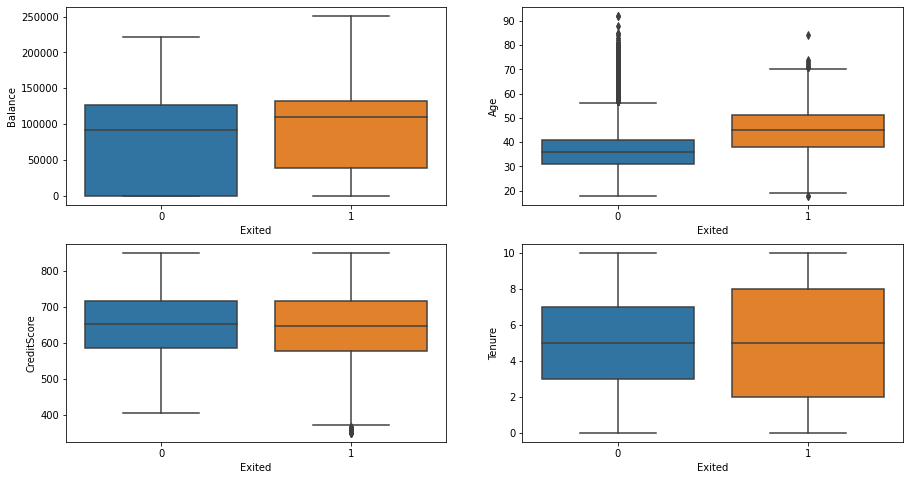

In [ ]:
# Checking outliers

_,axss = plt.subplots(2,2, figsize=[15,8])  # create a 2x2 matrix = 4 figures
sns.boxplot(data=df,x="Exited",y="Balance",ax=axss[0][0])
sns.boxplot(data=df,x="Exited",y="Age",ax=axss[0][1])
sns.boxplot(data=df,x="Exited",y="CreditScore",ax=axss[1][0])
sns.boxplot(data=df,x="Exited",y="Tenure",ax=axss[1][1])

According to the **boxplot**, **here we can see the features Balance and Age might have corelation with customers' churn**.

Next, We'll use **barplot** to explore the relation between categorical features and customers' churn

<AxesSubplot:xlabel='Exited', ylabel='count'>

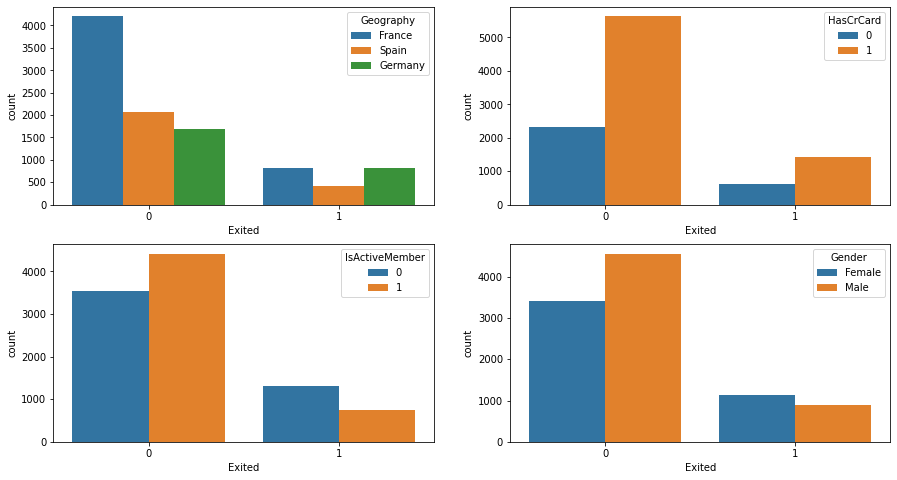

In [ ]:
_,axss = plt.subplots(2,2, figsize=[15,8])  # create a 2x2 matrix = 4 figures
sns.countplot(data=df,hue='Geography',x="Exited",ax=axss[0][0])
sns.countplot(data=df,hue='HasCrCard',x="Exited",ax=axss[0][1])
sns.countplot(data=df,hue='IsActiveMember',x="Exited",ax=axss[1][0])
sns.countplot(data=df,hue='Gender',x="Exited",ax=axss[1][1])

# Data/Feature Preprocessing

In [ ]:
df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

we notice the first two columns("RowNumber" and "CustomerId") are all unique values, in additiuon to "Surname", we cannot draw any conclusion from these
Plus, to furtherly train prediction model we want to select out "Exited" column as the* y value*

In [ ]:
X=df.iloc[:,3:-1]
y=df.iloc[:,-1]
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [ ]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [ ]:
X.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
dtype: object

In [ ]:
cat_cols = X.columns[X.dtypes == 'object']
num_cols = X.columns[(X.dtypes == 'float64') | (X.dtypes == 'int64')]

In [ ]:
cat_cols

Index(['Geography', 'Gender'], dtype='object')

In [ ]:
num_cols

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary'],
      dtype='object')

#### Dataset Split

In [ ]:
from sklearn import model_selection

In [ ]:
#stratified sampling
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.25, stratify = y, random_state=1) 

In [ ]:
print('training data has ' + str(X_train.shape[0]) + ' observation with ' + str(X_train.shape[1]) + ' features')
print('test data has ' + str(X_test.shape[0]) + ' observation with ' + str(X_test.shape[1]) + ' features')

training data has 7500 observation with 10 features
test data has 2500 observation with 10 features


We want to do dataset split before we preprocessing data (we want to ppreprocess training/testing data seperately) because we don't want to "leak" the test data info to the training dataset

#### OneHotEncoding for Categorical Data

##### method1: pd.get_dummies()

In [ ]:
X_train=pd.get_dummies(X_train,prefix=cat_cols).reset_index(drop=True)
X_test=pd.get_dummies(X_test,prefix=cat_cols).reset_index(drop=True)

In [ ]:
X_train.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,633,42,10,0.00,1,0,1,79408.17,0,0,1,0,1
1,708,23,4,71433.08,1,1,0,103697.57,0,1,0,1,0
2,548,37,9,0.00,2,0,0,98029.58,1,0,0,1,0
3,645,48,7,90612.34,1,1,1,149139.13,1,0,0,1,0
4,729,45,7,91091.06,2,1,0,71133.12,0,0,1,1,0


##### method2: sklearn.preprocessing.OneHotEncoder()

In [ ]:
from sklearn.preprocessing import OneHotEncoder
# categories = cat_cols
# # instantiate
# enc_ohe = OneHotEncoder()

# # fit (only fit training data!!!)
# enc_ohe.fit(X_train[categories])

# # transform
# def OneHotEncoding(df, enc, categories):  
#   transformed = pd.DataFrame(enc.transform(df[categories]).toarray(), columns=enc.get_feature_names(categories))
#   return pd.concat([df.reset_index(drop=True), transformed], axis=1).drop(categories, axis=1)

# X_train = OneHotEncoding(X_train, enc_ohe, categories)
# X_test = OneHotEncoding(X_test, enc_ohe, categories)
# X_train.head()

#### Standardization/Normalization for Numerical/Quantitative Data

In [ ]:
from sklearn.preprocessing import StandardScaler
# instantiate
scaler = StandardScaler()
# fit (only fit training data!!!)
scaler.fit(X_train[num_cols]) 
# transform
X_train[num_cols] = scaler.transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

In [ ]:
X_train.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,-0.172985,0.289202,1.731199,-1.218916,-0.912769,-1.542199,0.968496,-0.352044,0,0,1,0,1
1,0.602407,-1.509319,-0.341156,-0.076977,-0.912769,0.648425,-1.032529,0.072315,0,1,0,1,0
2,-1.051762,-0.184093,1.385806,-1.218916,0.796109,-1.542199,-1.032529,-0.026711,1,0,0,1,0
3,-0.048922,0.857156,0.695022,0.229625,-0.912769,0.648425,0.968496,0.866221,1,0,0,1,0
4,0.819517,0.573179,0.695022,0.237278,0.796109,0.648425,-1.032529,-0.496617,0,0,1,1,0


# Model Training

##### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
LogRg=LogisticRegression() #penalty{‘l1’, ‘l2’, ‘elasticnet’, None}, default=’l2’; C: default=1.0
LogRg.fit(X_train,y_train)
LogRg.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
LogRg.score(X_test,y_test)

0.8084

###### Improve by finding Optimal Hyperparameters using Grid Search

In [ ]:
#Loss/cost function --> (wx + b - y) ^2 + ƛ * |w| --> ƛ is a hyperparameter

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
parameters = {
    'penalty':('l2','l1'), 
    'C':(0.08, 0.14, 0.15, 0.2, 1)
}
Grid_LR = GridSearchCV(LogisticRegression(solver='liblinear'),parameters, cv=5)
Grid_LR.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=LogisticRegression(solver='liblinear'),
             param_grid={'C': (0.08, 0.14, 0.15, 0.2, 1),
                         'penalty': ('l2', 'l1')})

In [ ]:
Grid_LR.best_params_

{'C': 0.15, 'penalty': 'l1'}

In [ ]:
Grid_LR.best_estimator_.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
Grid_LR.best_estimator_.score(X_test,y_test)

0.8108

#### K Nearest Neighbour

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier() #n_neighbors, default=5
knn.fit(X_train,y_train)
knn.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
#accuracy (TP+TN)/(TP+NP+TN+FN)
knn.score(X_test,y_test)

0.8284

##### Improve by finding Optimal Hyperparameters using Grid Search

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
parameters = {
    'n_neighbors':[9,11,15,30,50,100]
}
Grid_KNN = GridSearchCV(KNeighborsClassifier(),parameters, cv=5)
Grid_KNN.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [9, 11, 15, 30, 50, 100]})

In [ ]:
Grid_KNN.best_params_

{'n_neighbors': 15}

In [ ]:
Grid_KNN.best_estimator_.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
#accuracy
Grid_KNN.best_estimator_.score(X_test,y_test)

0.8348

#### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf=RandomForestClassifier() #n_estimators, default=100; max_depth=None
rf.fit(X_train,y_train) 
rf.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
rf.score(X_test,y_test)

0.8592

##### Improve by finding Optimal Hyperparameters using Grid Search

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
parameters = {
    'n_estimators' : [100,200,300,500], #num_of_trees
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': [2,5,10,15,20] #tree's depth
}
Grid_RF=GridSearchCV(RandomForestClassifier(),parameters, cv=5)
Grid_RF.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [2, 5, 10, 15, 20],
                         'n_estimators': [100, 200, 300, 500]})

In [ ]:
Grid_RF.best_params_

{'criterion': 'gini', 'max_depth': 20, 'n_estimators': 500}

In [ ]:
Grid_RF.best_estimator_.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
Grid_RF.best_estimator_.score(X_test,y_test)

0.8592

#### Convolutional Neural Network

In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
cnn=MLPClassifier()
cnn.fit(X_train,y_train)
cnn.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
cnn.score(X_test,y_test)

0.8556

##### Improve by finding Optimal Hyperparameters using Grid Search

In [ ]:
import numpy as np

In [ ]:
parameters = {
    'solver': ['lbfgs','adam'], #‘lbfgs’ is an optimizer in the family of quasi-Newton methods. default="adam"
    'max_iter': [200,600],  # Maximum number of iterations, default = 200
    'alpha': 10.0 ** -np.arange(6, 12),  # default=0.0001 Strength of the L2 regularization term
    'hidden_layer_sizes':np.arange(10, 12) #array-like of shape(n_layers - 2,), default=(100,)
}
Grid_CNN=GridSearchCV(MLPClassifier(),parameters,cv=5)
Grid_CNN.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=MLPClassifier(),
             param_grid={'alpha': array([1.e-06, 1.e-07, 1.e-08, 1.e-09, 1.e-10, 1.e-11]),
                         'hidden_layer_sizes': array([10, 11]),
                         'max_iter': [200, 600], 'solver': ['lbfgs', 'adam']})

In [ ]:
Grid_CNN.best_params_

{'alpha': 1e-11, 'hidden_layer_sizes': 11, 'max_iter': 600, 'solver': 'adam'}

In [ ]:
Grid_CNN.best_estimator_.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
Grid_CNN.best_estimator_.score(X_test,y_test)

0.8576

# Model Evaluation

Finally, To see the performance of models with optimal hyperparameters, we use Confusion Matrix

[confusion matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.*html*)

{(TN FN) \
  (TP FP)}

In [ ]:
from sklearn.metrics import confusion_matrix

Logistic Regression

In [ ]:
y_pred=Grid_LR.best_estimator_.predict(X_test)
LR=confusion_matrix(y_test, y_pred)
LR

array([[1929,   62],
       [ 411,   98]])

In [ ]:
tn, fp, fn, tp=LR.ravel()
print("acurracy: " + str((tn+tp)/(tn+tp+fn+fp)))
print("precision: " + str((tp)/(tp+fp)))
print("recall: " + str((tp)/(tp+fn)))

acurracy: 0.8108
precision: 0.6125
recall: 0.1925343811394892


KNN

In [ ]:
y_pred=Grid_KNN.best_estimator_.predict(X_test)
KNN=confusion_matrix(y_test, y_pred)
KNN

array([[1928,   63],
       [ 350,  159]])

In [ ]:
tn, fp, fn, tp=KNN.ravel()
print("acurracy: " + str((tn+tp)/(tn+tp+fn+fp)))
print("precision: " + str((tp)/(tp+fp)))
print("recall: " + str((tp)/(tp+fn)))

acurracy: 0.8348
precision: 0.7162162162162162
recall: 0.31237721021611004


Random Forest

In [ ]:
y_pred=Grid_RF.best_estimator_.predict(X_test)
RF=confusion_matrix(y_test, y_pred)
RF

array([[1925,   66],
       [ 286,  223]])

In [ ]:
tn, fp, fn, tp=RF.ravel()
print("acurracy: " + str((tn+tp)/(tn+tp+fn+fp)))
print("precision: " + str((tp)/(tp+fp)))
print("recall: " + str((tp)/(tp+fn)))

acurracy: 0.8592
precision: 0.7716262975778547
recall: 0.4381139489194499


CNN MLPClassifier

In [ ]:
y_pred=Grid_CNN.best_estimator_.predict(X_test)
CNN=confusion_matrix(y_test, y_pred)
CNN

array([[1910,   81],
       [ 275,  234]])

In [ ]:
tn, fp, fn, tp=CNN.ravel()
print("acurracy: " + str((tn+tp)/(tn+tp+fn+fp)))
print("precision: " + str((tp)/(tp+fp)))
print("recall: " + str((tp)/(tp+fn)))

acurracy: 0.8576
precision: 0.7428571428571429
recall: 0.45972495088408644


based on the confusion matrix, Random Forest model with hyperparameter \
 {'criterion': 'gini', 'max_depth': 20, 'n_estimators': 300} \
  performed the best with: \
  acurracy: 0.8604 \
precision: 0.7836879432624113 \
recall: 0.43418467583497056 \

# Random Forest-Feature Importance

.feature_importances_

In [ ]:
FI = pd.DataFrame(Grid_RF.best_estimator_.feature_importances_, index=X_train.columns, columns=['Feature Importance'])
FI = FI.sort_values(by='Feature Importance',ascending=False)
FI

,Feature Importance
Age,0.239011
EstimatedSalary,0.144913
CreditScore,0.142673
Balance,0.137549
NumOfProducts,0.134865
Tenure,0.083767
IsActiveMember,0.036768
Geography_Germany,0.022710
HasCrCard,0.018247
Geography_France,0.010916


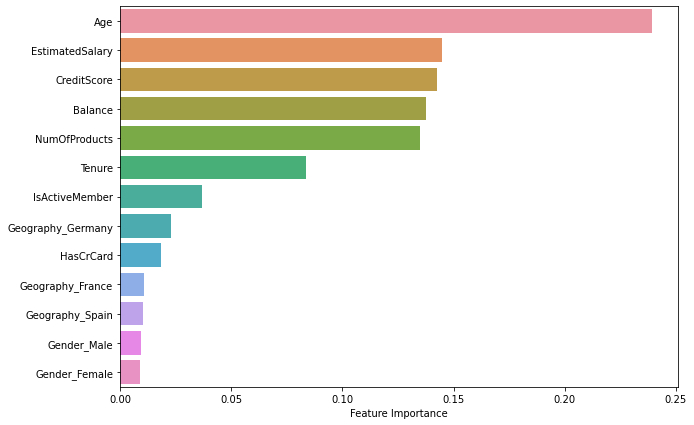

In [ ]:
g = sns.barplot(x="Feature Importance", y=FI.index, data=FI)
g.figure.set_size_inches(10, 7)

Permutation feature importance

In [ ]:
from sklearn.inspection import permutation_importance

In [ ]:
PI = permutation_importance(Grid_RF, X_test, y_test, n_repeats=5, random_state=1)
PI #dictionary

{'importances_mean': array([ 0.00256,  0.06528,  0.00232,  0.00744,  0.05376,  0.00056,
         0.02744,  0.00152,  0.00088,  0.00472,  0.00016, -0.00088,
        -0.00016]),
 'importances_std': array([0.00350177, 0.00455649, 0.00139485, 0.00174539, 0.00193659,
        0.00064992, 0.00488983, 0.00096   , 0.00129985, 0.00177809,
        0.00074189, 0.0011703 , 0.00159198]),
 'importances': array([[-0.0044,  0.0044,  0.0036,  0.0048,  0.0044],
        [ 0.0624,  0.066 ,  0.0732,  0.0596,  0.0652],
        [ 0.0048,  0.0028,  0.0016,  0.0016,  0.0008],
        [ 0.008 ,  0.0084,  0.0088,  0.008 ,  0.004 ],
        [ 0.0504,  0.0528,  0.0556,  0.0548,  0.0552],
        [ 0.0016, -0.0004,  0.0004,  0.0008,  0.0004],
        [ 0.0328,  0.0192,  0.0296,  0.0308,  0.0248],
        [ 0.002 ,  0.002 , -0.0004,  0.002 ,  0.002 ],
        [ 0.    ,  0.0004,  0.0024,  0.0024, -0.0008],
        [ 0.006 ,  0.002 ,  0.0072,  0.004 ,  0.0044],
        [ 0.0008, -0.0008,  0.0012, -0.0004,  0.    ],
   

In [ ]:
PI_df = pd.DataFrame(data=np.transpose([PI['importances_mean'],PI['importances_std']]), 
             index = X_test.columns,columns=['PI_mean','PI_std'])
PI_df = PI_df.sort_values(by='PI_mean',ascending=False)
PI_df


,PI_mean,PI_std
Age,0.06528,0.004556
NumOfProducts,0.05376,0.001937
IsActiveMember,0.02744,0.004890
Balance,0.00744,0.001745
Geography_Germany,0.00472,0.001778
CreditScore,0.00256,0.003502
Tenure,0.00232,0.001395
EstimatedSalary,0.00152,0.000960
Geography_France,0.00088,0.001300
HasCrCard,0.00056,0.000650


# SHAP value: show positive/negative effect of each predictor(feature)
  https://github.com/slundberg/shap

In [ ]:
import xgboost
import shap

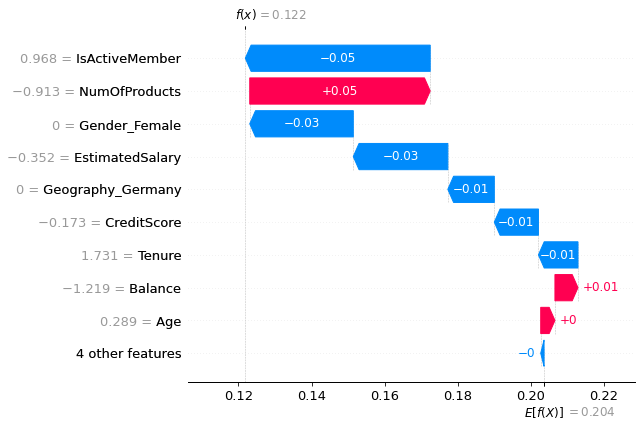

In [ ]:
model = xgboost.XGBRegressor().fit(X_train, y_train)
# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn, transformers, Spark, etc.)
explainer = shap.Explainer(model)
shap_values = explainer(X_train)

# visualize the first prediction's explanation
shap.plots.waterfall(shap_values[0])

# Summary/Conclusion
